In [20]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
#pd.options.display.max_columns = None # display all column

#### User variables

In [174]:
filename='20210604_testRNA_gain2.txt'
time_unit='hours' #'hours','minutes',seconds'
Rep_wells=[['A14','A15','A16'],['B14','B15','B16'],['C14','C15','C16'],['D14','D15','D16'],['E14','E15','E16']]
Rep_names=['30 ug/ml polyU','60 ug/ml polyU','100 ug/ml polyU','150 ug/ml polyU','300 ug/ml polyU']
plotErrorBar='all'#'None','final','all'
splitPlot=True #if True, plot each serie in a different plot
timeSlice=60 # time at which values will be plotted. Same unit as time_unit

#### Data

In [175]:
with open(filename) as csv_file:
    tab=pd.read_csv(csv_file,delimiter=';',header=7, index_col=1, infer_datetime_format=True)
tab

,Well,A14,A15,A16,A18,A19,B14,B15,B16,B18,...,L16,M14,M15,M16,O14,O15,O16,P14,P15,P16
0 h,Raw Data (449-8/482-8 2),1521,939,1419,1070,1347,1491,1478,1709,1434,...,1554,1883,1735,1733,615,1247,964,871,614,913
0 h 10 min,Raw Data (449-8/482-8 2),1054,972,882,1405,1083,1102,1267,1458,1289,...,1673,1755,2511,2196,741,1225,908,869,632,864
0 h 20 min,Raw Data (449-8/482-8 2),1064,1073,1223,948,1141,1233,1377,1418,1433,...,1772,1976,1638,1542,813,951,851,740,595,851
0 h 30 min,Raw Data (449-8/482-8 2),1423,1170,693,934,1155,1319,1477,1267,1808,...,1724,1752,2012,2205,848,782,850,809,751,1049
0 h 40 min,Raw Data (449-8/482-8 2),1149,1483,1094,873,1050,1281,1412,1506,1713,...,1495,2131,1679,2078,734,1088,1092,1134,868,1116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62 h 50 min,Raw Data (449-8/482-8 2),14028,14758,20750,1006,1998,32896,24241,33685,1329,...,1000,5984,34235,7188,92094,92736,106739,120976,91237,100856
63 h,Raw Data (449-8/482-8 2),13694,15372,18518,1177,2145,31882,23551,34366,1435,...,1156,5746,33212,7050,88504,90700,104496,119470,94649,102388
63 h 10 min,Raw Data (449-8/482-8 2),14770,14398,18833,981,1403,30020,24064,33743,1647,...,870,5975,35200,7377,91956,89772,107866,115069,90561,100737
63 h 20 min,Raw Data (449-8/482-8 2),13101,14442,19357,1178,1664,32358,24561,35230,1442,...,1169,5545,34096,7588,88172,89862,105525,119927,91850,100447


In [176]:
tab.index=pd.to_timedelta(tab.index)#convert index column in timedeltas
tab['time_seconds']=tab.index.total_seconds()#create a new column containing time in seconds
tab['time_minutes'],tab['time_hours']=tab['time_seconds']/60,tab['time_seconds']/3600 #create new columns containing time in minutes and hours
print('Total experiment time is',str(tab.index[-1]))
### TEST ###
#tab[["A01","A03"]]
#tab.iloc[-11]#Give all wells value at a given time index
#tab.index
#tab.index=='0 days 00:40:00'

Total experiment time is 2 days 15:30:00


In [177]:
for i in range(len(Rep_wells)):
    tab[Rep_names[i]]=tab[Rep_wells[i]].mean(axis=1)
    tab[Rep_names[i]+'_std']=tab[Rep_wells[i]].std(axis=1)
#tab

<IPython.core.display.Javascript object>


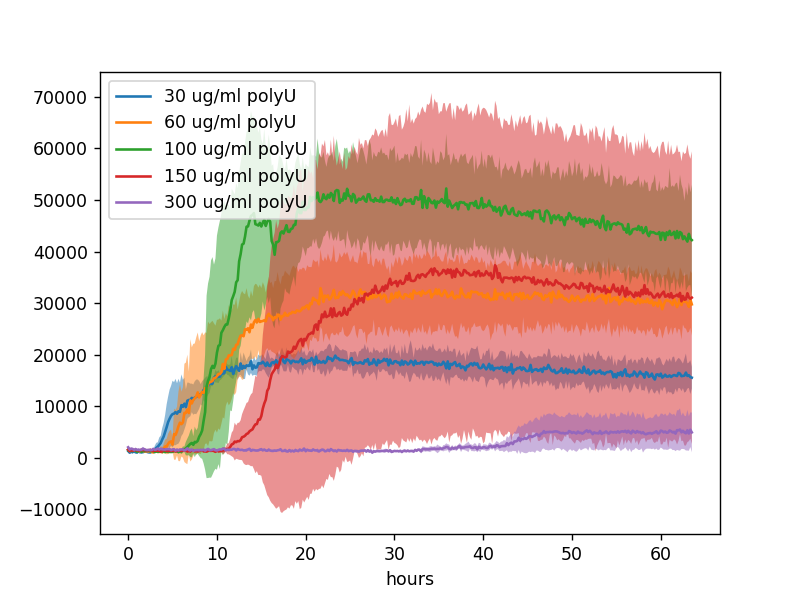

In [178]:
tab.plot(x="time_"+time_unit,y=Rep_names,xlabel=time_unit,yerr=tab[[s+"_std" for s in Rep_names]])#yerr does not deplay a thing. To be fixed
#plt.plot(tab["time_hours"],tab["A01"])
if plotErrorBar=='all':
    for i in range(len(Rep_wells)):
        plt.fill_between(tab["time_"+time_unit],tab[Rep_names[i]]+tab[Rep_names[i]+"_std"],tab[Rep_names[i]]-tab[Rep_names[i]+"_std"],alpha=0.5)

<IPython.core.display.Javascript object>


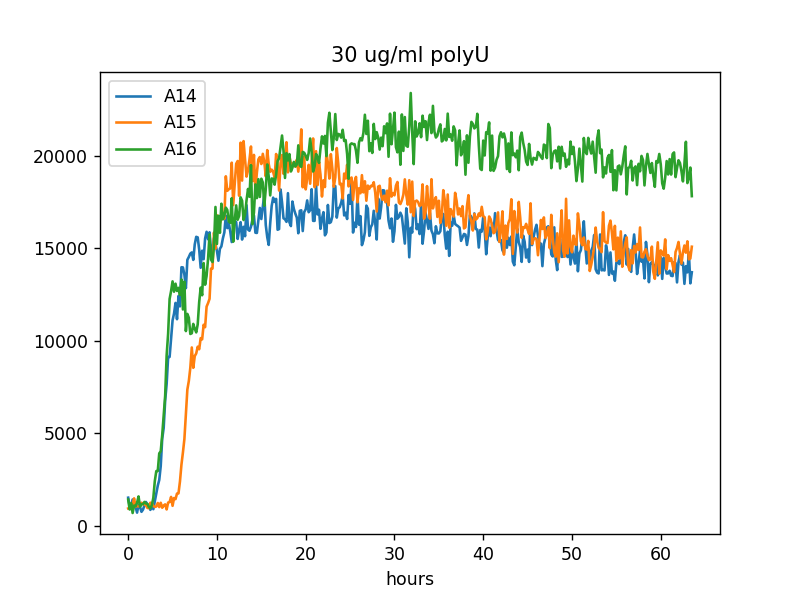

<IPython.core.display.Javascript object>


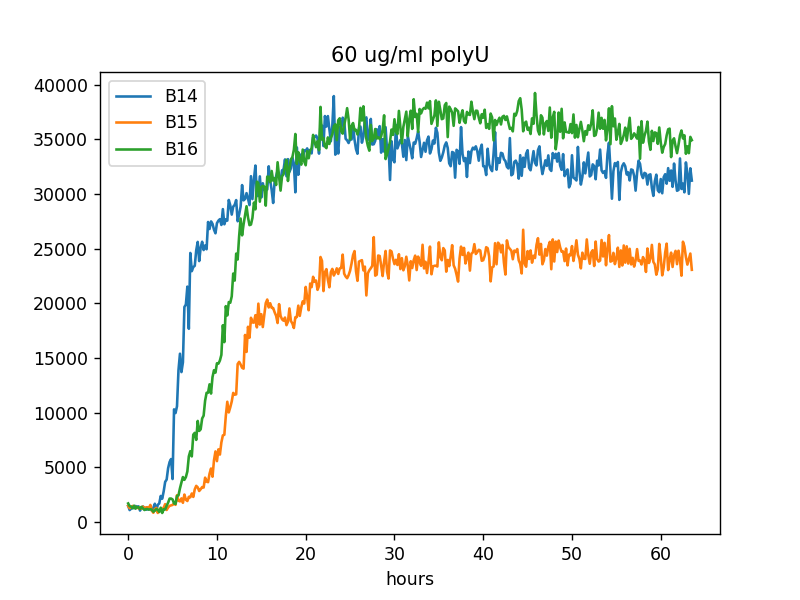

<IPython.core.display.Javascript object>


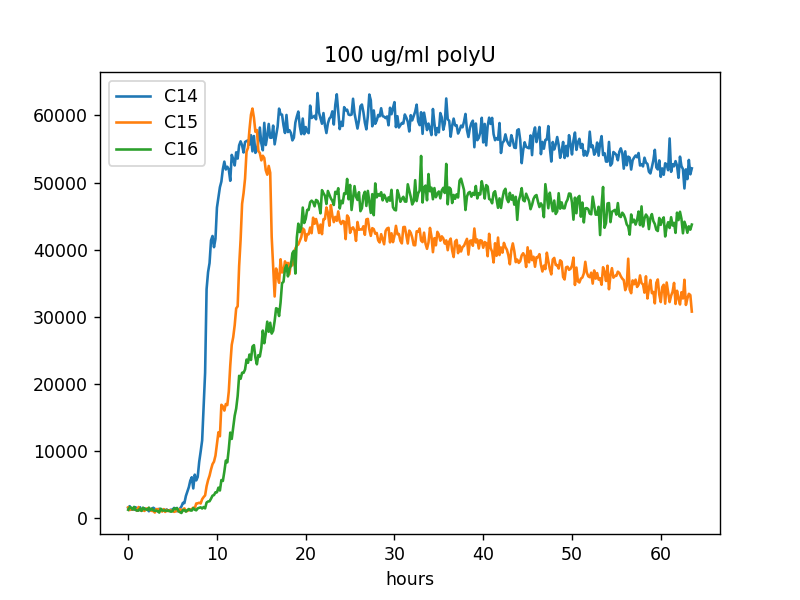

<IPython.core.display.Javascript object>


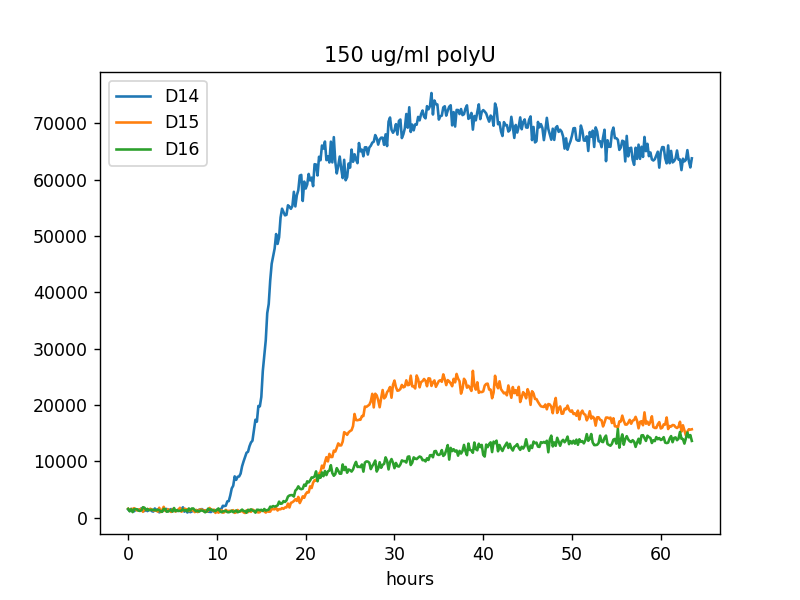

<IPython.core.display.Javascript object>


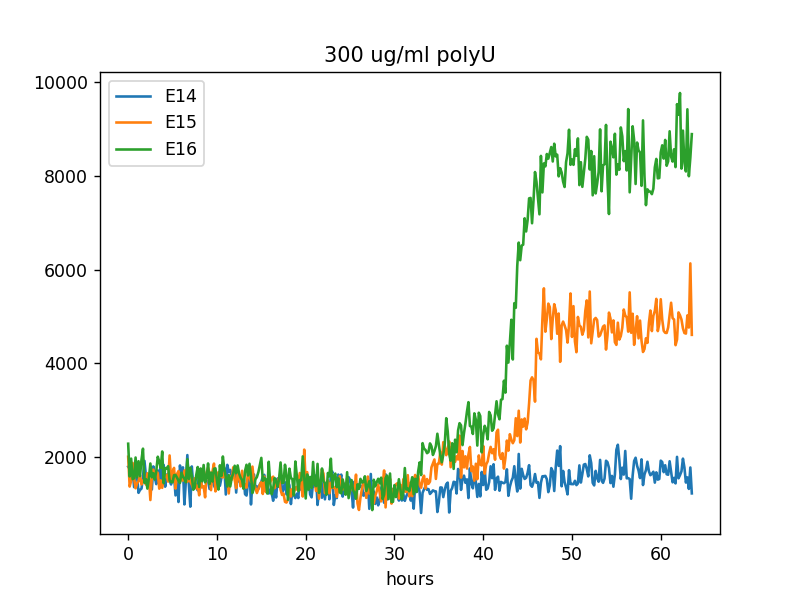

In [179]:
if splitPlot:
    for i in range(len(Rep_wells)):
        tab.plot(x="time_"+time_unit,y=Rep_wells[i],xlabel=time_unit,title=Rep_names[i])
        plt.title

<IPython.core.display.Javascript object>


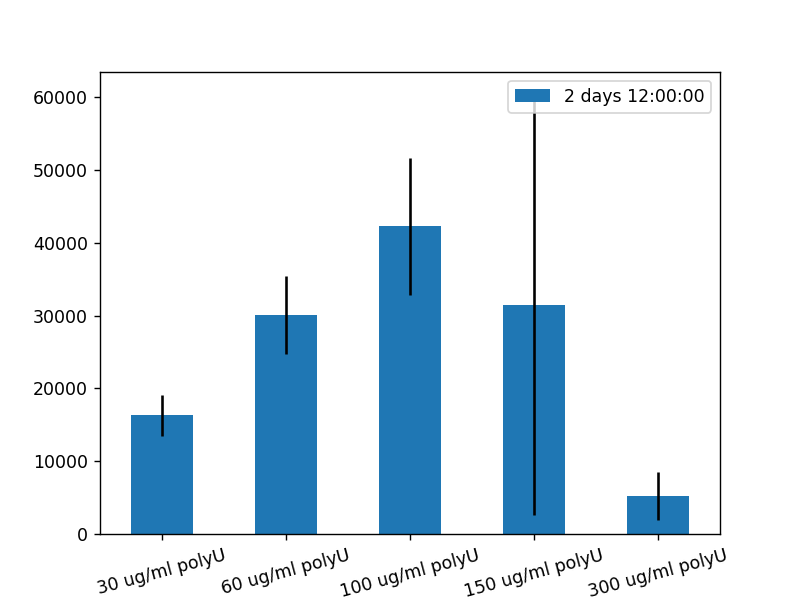

<AxesSubplot:>

In [181]:
SliceName=(tab["time_"+time_unit]>=timeSlice).idxmax()#name of time index
tab_tr=tab.transpose()
#tab_tr.index
tab_tr.loc[Rep_names].plot.bar(y=SliceName,rot=15,yerr=np.array(tab_tr.loc[[s+"_std" for s in Rep_names],SliceName]))

In [84]:
tab[Rep_names]

,30 ug/ml polyU,60 ug/ml polyU,100 ug/ml polyU,150 ug/ml polyU,300 ug/ml polyU
0 days 00:00:00,1293.000000,1559.333333,1461.333333,1561.000000,2020.000000
0 days 00:10:00,969.333333,1275.666667,1535.333333,1265.000000,1579.666667
0 days 00:20:00,1120.000000,1342.666667,1430.000000,1562.666667,1751.666667
0 days 00:30:00,1095.333333,1354.333333,1281.333333,1320.333333,1700.333333
0 days 00:40:00,1242.000000,1399.666667,1454.000000,1466.000000,1476.000000
...,...,...,...,...,...
2 days 14:50:00,16512.000000,30274.000000,42424.000000,30751.000000,4724.666667
2 days 15:00:00,15861.333333,29933.000000,41925.000000,31904.333333,5333.666667
2 days 15:10:00,16000.333333,29275.666667,43431.666667,31103.666667,4688.333333
2 days 15:20:00,15633.333333,30716.333333,42487.666667,30841.000000,5430.333333


KeyError: False